<a href="https://colab.research.google.com/github/MagicMoleMM/ML/blob/main/08_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(50, 2)


(-3.5, 7.5, -3.938853130834508, 12.036033868111778)

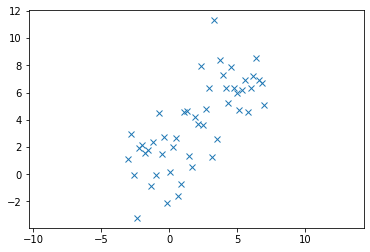

In [1]:
import numpy as np
import  pickle
from matplotlib import pyplot as plt
%matplotlib inline 

with open('/content/drive/MyDrive/Colab Notebooks/Файлы для обучения/eigen.pkl','rb') as f:
  X = pickle.load(f)

print(X.shape)
plt.plot(X[:,0], X[:,1], 'x')
plt.axis('equal')

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1).fit(X)
X_pca = pca.transform(X)
X_pca[:10]

array([[5.28331909],
       [3.84284422],
       [5.88859559],
       [8.07409089],
       [4.16799935],
       [3.8592636 ],
       [4.17040423],
       [3.86884344],
       [5.65483844],
       [3.16278418]])

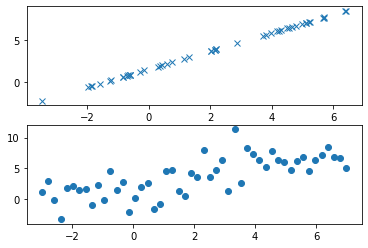

In [ ]:
X_new = pca.inverse_transform(X_pca)

plt.figure()
plt.subplot(211)
plt.plot(X_new[:,0],X_new[:,1], 'x')
plt.subplot(212)
plt.plot(X[:,0],X[:,1], 'o')

In [ ]:
mean_val = X.mean(axis=0)
N = X.shape[0]
X_centered = X.copy() - mean_val
X_centered [:10]

array([[-5.        , -2.57641926],
       [-4.79591837, -0.80537034],
       [-4.59183673, -3.77593421],
       [-4.3877551 , -6.93656366],
       [-4.18367347, -1.81203199],
       [-3.97959184, -1.58026031],
       [-3.7755102 , -2.19158187],
       [-3.57142857, -1.96956883],
       [-3.36734694, -4.58683833],
       [-3.16326531, -1.38553735]])

In [ ]:
X_cov = X_centered.T.dot(
    X_centered
) / (N-1)

print(f'Ковариционная матрица: \n {X_cov}')

Ковариционная матрица: 
 [[8.85047897 6.81117445]
 [6.81117445 9.95969352]]


In [ ]:
np.cov(X_centered, rowvar=0)


array([[8.85047897, 6.81117445],
       [6.81117445, 9.95969352]])

In [ ]:
from numpy import linalg

eigenvalues, eigenvectors = linalg.eig(X_cov)
eigenvectors.T

array([[-0.7352406 ,  0.67780621],
       [-0.67780621, -0.7352406 ]])

-0.7352406017908735 -0.6778062093830318


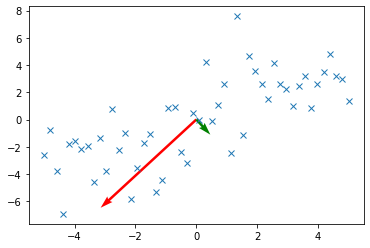

In [ ]:
origin = np.array(X_centered.mean(axis=0)) #начало координат
print(*eigenvectors.T[:,0])

plt.quiver(*origin, *eigenvectors.T[:,0], color=['r'], scale=eigenvalues[0])
plt.quiver(*origin, *eigenvectors.T[:,1], color=['g'], scale=eigenvalues[1])
plt.plot(X_centered[:,0],X_centered[:,1], 'x')

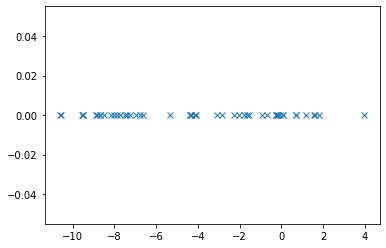

In [ ]:
max_eigenval = np.argmax(eigenvalues)
max_eigenvector = eigenvectors[:,max_eigenval].reshape(-1,1)

X_redused = X.dot(max_eigenvector)

plt.plot(X_redused,np.zeros(N), 'x')

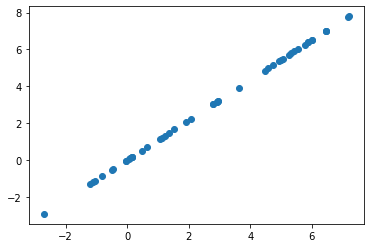

In [ ]:
X_inverse = X_redused.dot(max_eigenvector.reshape(1,-1))
plt.plot(X_inverse[:,0],X_inverse[:,1], 'o')

In [2]:
from sklearn.decomposition import TruncatedSVD


In [3]:
svd_model = TruncatedSVD(n_components=1).fit(X)
svd_model

TruncatedSVD(n_components=1)

In [6]:
from scipy.sparse.linalg.isolve.iterative import set_docstring
X_svd = svd_model.transform(X)
X_svd

array([[-0.74822365],
       [ 0.82837175],
       [-1.50733603],
       [-3.99986685],
       [ 0.34368607],
       [ 0.65022432],
       [ 0.26112661],
       [ 0.559613  ],
       [-1.4845917 ],
       [ 1.27210421],
       [-0.58533609],
       [ 3.31221931],
       [ 0.89428692],
       [ 2.0833943 ],
       [-1.81118765],
       [ 0.1667028 ],
       [ 1.8128714 ],
       [ 2.43899196],
       [-0.9459678 ],
       [-0.09017116],
       [ 4.39036199],
       [ 4.58532014],
       [ 1.96888806],
       [ 1.41928926],
       [ 4.53679783],
       [ 4.21355894],
       [ 7.8479204 ],
       [ 4.40827436],
       [ 5.47017639],
       [ 6.84469558],
       [ 2.82199488],
       [11.21124418],
       [ 4.14481079],
       [ 9.01117461],
       [ 8.23198661],
       [ 7.58155599],
       [ 6.74589409],
       [ 9.07884956],
       [ 7.90853244],
       [ 7.72794792],
       [ 6.83433857],
       [ 8.13666751],
       [ 8.83612771],
       [ 7.0353363 ],
       [ 8.58646031],
       [ 9

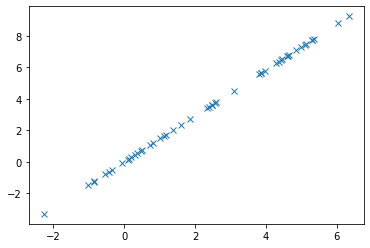

In [8]:
X_svd_restored = svd_model.inverse_transform(X_svd)

plt.plot(X_svd_restored[:,0],X_svd_restored[:,1], 'x')

In [8]:
import pandas as pd

df_source = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Файлы для обучения/client_segmentation.csv')
X = df_source[['call_diff','sms_diff','traffic_diff']].values
y = df_source.customes_class.values
y

array([0., 2., 0., 1., 2., 0., 1., 2., 2., 0., 2., 1., 0., 1., 0., 2., 1.,
       1., 2., 1., 0., 0., 2., 1., 1., 1., 2., 2., 2., 2., 2., 1., 1., 0.,
       2., 1., 1., 1., 1., 2., 2., 1., 0., 0., 2., 0., 0., 0., 2., 1., 0.,
       0., 0., 0., 0., 2., 0., 2., 0., 0., 1., 0., 2., 0., 1., 2., 1., 2.,
       0., 2., 0., 0., 1., 2., 0., 0., 2., 1., 1., 1., 1., 2., 1., 1., 2.,
       1., 0., 2., 1., 2., 2., 0., 1., 2., 0., 1., 2., 0., 1., 0.])

In [10]:
from sklearn.manifold import TSNE

tsne_transformer = TSNE(n_components=2)

x_tsne = tsne_transformer.fit_transform(X)
x_tsne[:10]

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[-0.07218028, -0.16752113],
       [-3.0143614 , -4.4278584 ],
       [ 0.73424894,  1.5856559 ],
       [ 6.480952  ,  0.8723119 ],
       [-2.1301215 , -5.782043  ],
       [ 2.5945203 ,  1.5120298 ],
       [ 5.9385176 , -0.01076613],
       [-1.8656514 , -4.6587625 ],
       [-2.5545692 , -5.2344    ],
       [ 1.6721756 ,  4.2013035 ]], dtype=float32)